<a href="https://colab.research.google.com/github/biranchi2018/face_recognition_single_image/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install face_recognition

    100% |████████████████████████████████| 100.2MB 305kB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
import face_recognition
import cv2
import os
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# !ls

In [9]:
cv2.__version__

'3.4.3'

In [0]:
video_capture = cv2.VideoCapture(0)
#length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

#video_capture.set(3,500)
#video_capture.set(4,400)

video_capture.set(3,800)
video_capture.set(4,600)

time.sleep(2)
video_capture.set(15, -8.0)


WINDOW_NAME = 'Face Recognition'
# cv2.namedWindow(WINDOW_NAME,  cv2.WINDOW_AUTOSIZE)


# """
#  Enable the below code to record and save in video file format 
# """

# Create an output movie file (make sure resolution/frame rate matches input video!)

shouldRecord = False				# Make it "True" to record and save

if shouldRecord == True:

	screen_width = int(video_capture.get(3))
	screen_height = int(video_capture.get(4))

	# print("screen_width : ", screen_width)
	# print("screen_height : ", screen_height)

	resolution = (screen_width, screen_height)
	frameRate = 10.0

	# fourcc = cv2.VideoWriter_fourcc(*'XVID')
	# fourcc2 = cv2.VideoWriter_fourcc(*'MP4V')
	fourcc3 = cv2.VideoWriter_fourcc(*'H264')


	# out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
	out = cv2.VideoWriter('output.mp4',fourcc3, frameRate, resolution)



In [11]:
faces_dataset = "dataset_faces.dat"
known_faces = []
known_face_names = []

all_face_encodings = {}

"""
	1. Create a folder called "faces" and put the image files inside it.
	2. Name the images as PersonName.jpg or PersonName.png
"""


'\n\t1. Create a folder called "faces" and put the image files inside it.\n\t2. Name the images as PersonName.jpg or PersonName.png\n'

In [0]:
os.mkdir("faces")

In [16]:
if not os.path.isfile(faces_dataset):

    files = os.listdir( os.path.join(os.getcwd(), "faces") )
    # print(files)

    for file_name in files:
        
        if file_name==".DS_Store":
            continue

        file_path = os.path.join(os.getcwd(), "faces", file_name)
        #print("file_path : " + file_path)
        
        photo = face_recognition.load_image_file(file_path)
        # print(photo)
        # print("Encoding : ")
    #    print(file_name)
    #    print(face_recognition.face_encodings(photo))

        if len(face_recognition.face_encodings(photo)) > 0:
            photo_encoding = face_recognition.face_encodings(photo)[0]
            person_name = file_name.split(".")[0].capitalize()

            known_faces.append(photo_encoding)
            known_face_names.append(person_name)

            
            all_face_encodings[person_name] = photo_encoding
            
            print(str(files.index(file_name) + 1) + "." + person_name)


    # print("\nknown_face_names : " + str(known_face_names))

    with open('dataset_faces.dat', 'wb') as f:
        pickle.dump(all_face_encodings, f)

    #--------
else:
    # Load face encodings
    with open('dataset_faces.dat', 'rb') as f:
        all_face_encodings = pickle.load(f)

    # Grab the list of names and the list of encodings
    known_face_names = list(all_face_encodings.keys())
    known_faces = np.array(list(all_face_encodings.values()))




1.Rinky
2.Cyrus
3.Amin
4.Shaw
5.Brad
6.Biranchi
7.Khairul
8.Dan
9.Xu jing
10.Alex
11.Anis
12.Bernard
13.Cynthia
14.Stan
15.Yasmine
16.Sattian
17.Gordona
18.Deepan


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg
face_names :  ['Biranchi']


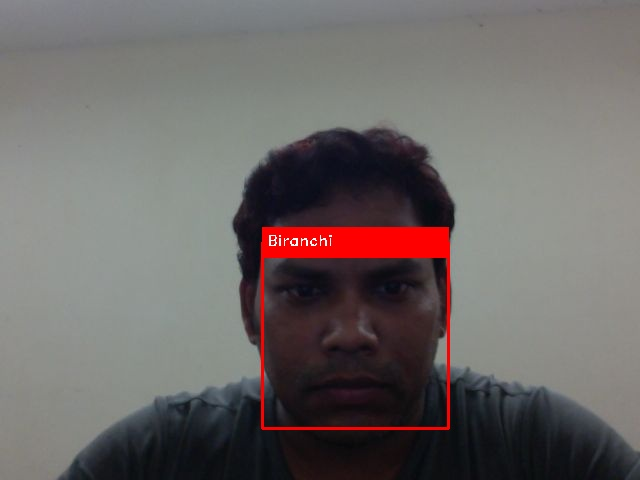

In [31]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  #display(Image(filename))
  
  # Initialize some variables
  face_locations = []
  face_encodings = []
  face_names = []
  frame_number = 0
  
  frame = cv2.imread(filename)
  rgb_frame = frame[:, :, ::-1]
  
  face_locations = face_recognition.face_locations(rgb_frame)
  face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

  face_names = []
  
  for face_encoding in face_encodings:
    
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

    # print("match : " + str(match))

    # If you had more than 2 faces, you could make this logic a lot prettier
    # but I kept it simple for the demo
    name = "Unknown"

    if True in matches:
      first_match_index = matches.index(True)
      name = known_face_names[first_match_index]
      
    face_names.append(name)
      
      
  print("face_names : ", face_names)
      
  # Label the results
  for (top, right, bottom, left), name in zip(face_locations, face_names):
    if not name:
      continue

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name above the face
    cv2.rectangle(frame, (left, top - 15), (right, top + 15), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 5, top + 3), font, 0.5, (255, 255, 255), 1)


  detected_image = "detected.jpg"
  cv2.imwrite(detected_image, frame)
  display(Image(detected_image))

  
 
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
# webcam = cv2.VideoCapture(0)
# ret, frame = webcam.read()
# print(ret)
# webcam.release()